# Análisis de Red de Transporte Aéreo

In [1]:
using DelimitedFiles
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
using LightGraphs
using Distributions
using GLM
using DataFrames

In [3]:
using StatsBase

### Se crea tabla de información con nodos y enlaces

In [4]:
#SE IMPORTA LA LISTA DE AEROLÍNEAS
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas.csv", ',', String);
lista_aerolineas = info_aerolineas[:, 2]

526-element Array{String,1}:
 "Airlines"     
 "global"       
 "Star_Alliance"
 "Sky_Team"     
 "oneworld"     
 "AA"           
 "TK"           
 "DL"           
 "MU"           
 "CZ"           
 "UA"           
 "FR"           
 "BA"           
 ⋮              
 "H7"           
 "GY"           
 "EW"           
 "D6"           
 "7E"           
 "6Y"           
 "6I"           
 "5M"           
 "5G"           
 "4K"           
 "4D"           
 "4B"           

#### Número de nodos para cada red

Global 3072  

Star Alliance 934  

Sky Team 900

oneworld 698

#### Número de enlaces para cada red

Global 33093

Star Alliance 6553

Sky Team 5879

oneworld 3579

### Densidad de la red dirigida
$$ D(A, B) = \frac{|E|}{|V| ( |V| - 1 )}$$

con $A$ y $B$ conjuntos,  
$E$ los enlaces y  
$V$ los vértices

### grado promedio de la red dirigida
$$ c = \frac{m}{n}$$

con  
$m$ los enlaces y  
$n$ los vértices

In [5]:
#NOMBRE DE LA AEROLÍNEA (ARCHIVO) ciclo for para todas las aerolíneas

tabla_info_net = ["Airline" "Nodes" "Links" "Density" "Av. Degree" "Av. Betweenness" " Global Clustering Coefficient"]

for i in 2:length(lista_aerolineas) #Desde el 2 para no tomar la primera entrada "Airlines"
    
    airline_code = lista_aerolineas[i] #Código
    aerolinea_matriz = string(airline_code, "_import_matrix.csv")
    leo_matriz = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/matriz/$aerolinea_matriz", Int64)
    
    nodos = size(leo_matriz)[1]
    enlaces = counts(leo_matriz)[2]
    
    denom = nodos * (nodos - 1)
    densidad = enlaces / denom
    
    aerolinea_in_degree = string(airline_code, "_in_degree.csv")
    #leo_in_degree = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/grados/$aerolinea_in_degree", Float64)
    promedio_degree = enlaces/nodos
    #datos_in_degree = push!(datos_in_degree, promedio_degree)
    
    grafo = DiGraph(leo_matriz)
    
    res = betweenness_centrality(grafo, endpoints=true)
    av_bet = mean(res)
    
    gcc = global_clustering_coefficient(grafo)

    renglon = [airline_code nodos enlaces densidad promedio_degree av_bet gcc]
    tabla_info_net = vcat(tabla_info_net, renglon)
    
end

return tabla_info_net 

526×7 Array{Any,2}:
 "Airline"            "Nodes"  …   " Global Clustering Coefficient"
 "global"         3072            0.0624714                        
 "Star_Alliance"   934            0.041161                         
 "Sky_Team"        900            0.0353407                        
 "oneworld"        698            0.0275631                        
 "AA"              259         …  0.0256278                        
 "TK"              242            0.000531558                      
 "DL"              230            0.0233983                        
 "MU"              192            0.0391239                        
 "CZ"              188            0.050904                         
 "UA"              184         …  0.0325717                        
 "FR"              176            0.0567275                        
 "BA"              175            8.14885e-5                       
 ⋮                             ⋱                                   
 "H7"                2      

In [10]:
tabla_info_net;

### Similitud entre las redes. Coeficiente de Jaccard
$$ J(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

donde $A$ y $B$ son conjuntos

#### Tabla de coeficientes de Jaccard de las aerolíneas

In [177]:
#Checar

j_nodo = []
j_enlace = []


j_nodo = push!(j_nodo, "Jaccard C. Nodes")

j_enlace = push!(j_enlace, "Jaccard C. Links")


k = 0

for i in 6:length(lista_aerolineas)
    
    inters_nodo = abs(tabla_info_net[i, 2])    
    #@show inters_nodo
    suma_nodo = abs(tabla_info_net[2, 2]) + abs(tabla_info_net[i, 2])
    #@show suma_nodo
    jaccy_nodo = inters_nodo / (suma_nodo - inters_nodo)
    #@show jaccy_nodo
    j_nodo = push!(j_nodo, jaccy_nodo)
    #@show j_nodo
    
    inters_enlace = abs(tabla_info_net[i, 3])
    suma_enlace = abs(tabla_info_net[2, 3]) + abs(tabla_info_net[i, 3])
    jaccy_enlace = inters_enlace / (suma_enlace - inters_enlace)
    j_enlace = push!(j_enlace, jaccy_enlace)
    #@show j_enlace
    

end

jaccard_densidad = hcat(j_nodo, j_enlace, densidad)

return jaccard_densidad;

In [178]:
tabla_info_net = hcat(tabla_info_net, jaccard_densidad)

5×6 Array{Any,2}:
 "Airline"            "Nodes"  …   "Jaccard C. Links"   "Densidad"
 "global"         3072            1.0                  0.0035078  
 "Star_Alliance"   934            0.198018             0.00751989 
 "Sky_Team"        900            0.177651             0.0072661  
 "oneworld"        698            0.10815              0.00735654 

### Gráficas

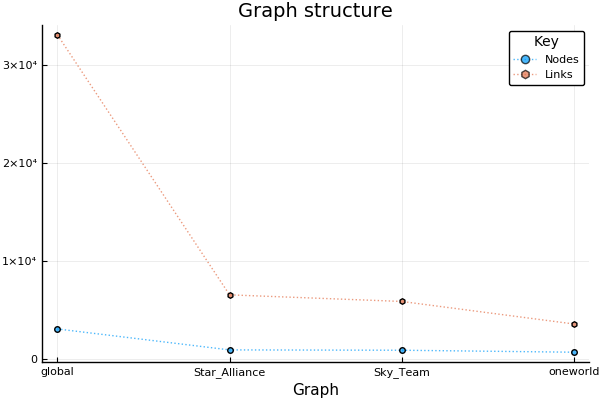

In [156]:
x = [tabla_info_net[2,1], tabla_info_net[3,1], tabla_info_net[4,1], tabla_info_net[5,1]]
y1 = [tabla_info_net[2,2], tabla_info_net[3,2], tabla_info_net[4,2], tabla_info_net[5,2]]
y2 = [tabla_info_net[2,3], tabla_info_net[3,3], tabla_info_net[4,3], tabla_info_net[5,3]]
y3 = [tabla_info_net[2,4], tabla_info_net[3,4], tabla_info_net[4,4], tabla_info_net[5,4]]
y4 = [tabla_info_net[2,5], tabla_info_net[3,5], tabla_info_net[4,5], tabla_info_net[5,5]]
y5 = [tabla_info_net[2,6], tabla_info_net[3,6], tabla_info_net[4,6], tabla_info_net[5,6]]
plot(x, y1, alpha=0.7, line=(:dot, 1),marker=([:circle :d]), markersize=4,legendtitle="Key", label="Nodes", xlabel="Graph", ylabel="", title="Graph structure")
plot!(x, y2, alpha=0.7, line=(:dot, 1),marker=([:hex :d]), markersize=4, label="Links")
#plot!(x, y3, alpha=0.7, line=(:dot, 1),marker=([:ltriangle :d]), markersize=4, label="Jaccard coef. Nodes")
#plot!(x, y4, alpha=0.7, line=(:dot, 1),marker=([:dtriangle :d]), markersize=4, label="Jaccard coef. Links")
#plot!(x, y5, alpha=0.7, line=(:dot, 1),marker=([:diamond :d]), markersize=4, label="Density")

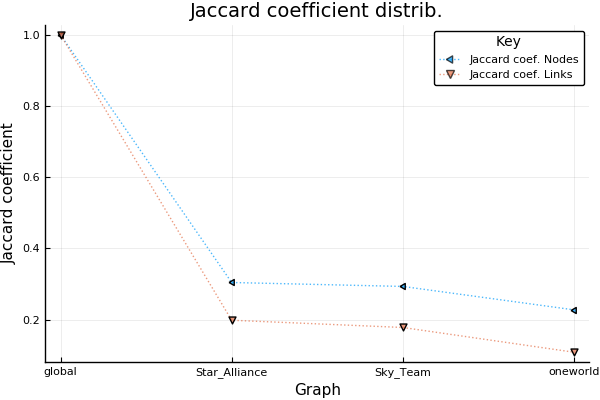

In [157]:
x = [tabla_info_net[2,1], tabla_info_net[3,1], tabla_info_net[4,1], tabla_info_net[5,1]]
y3 = [tabla_info_net[2,4], tabla_info_net[3,4], tabla_info_net[4,4], tabla_info_net[5,4]]
y4 = [tabla_info_net[2,5], tabla_info_net[3,5], tabla_info_net[4,5], tabla_info_net[5,5]]
#y5 = [tabla_info_net[2,6], tabla_info_net[3,6], tabla_info_net[4,6], tabla_info_net[5,6]]
plot(x, y3, alpha=0.7, line=(:dot, 1),marker=([:ltriangle :d]), markersize=5, legendtitle="Key", label="Jaccard coef. Nodes", xlabel="Graph", ylabel="Jaccard coefficient", title="Jaccard coefficient distrib.")
plot!(x, y4, alpha=0.7, line=(:dot, 1),marker=([:dtriangle :d]), markersize=5, label="Jaccard coef. Links")

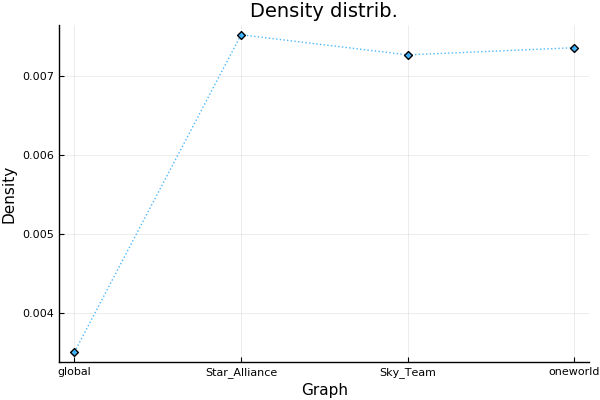

In [158]:
x = [tabla_info_net[2,1], tabla_info_net[3,1], tabla_info_net[4,1], tabla_info_net[5,1]]
y5 = [tabla_info_net[2,6], tabla_info_net[3,6], tabla_info_net[4,6], tabla_info_net[5,6]]
plot(x, y5, alpha=0.7, line=(:dot, 1),marker=([:diamond :d]), markersize=4, legend=false, xlabel="Graph", ylabel="Density", title="Density distrib.")

* Entre más similar es la red de la alianza o aerolínea con la red global, la cobertura o área de contagio es mayor.
* La densidad no pareciera que tiene relación con el área de infección.

### Gráficas de cobertura

In [10]:
layer_cov_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/cobertura/global_layer_coverage.csv", ',', Float64);
layer_cov_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/cobertura/Star_Alliance_layer_coverage.csv", ',', Float64);
layer_cov_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/cobertura/oneworld_layer_coverage.csv", ',', Float64);
layer_cov_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/cobertura/Sky_Team_layer_coverage.csv", ',', Float64);

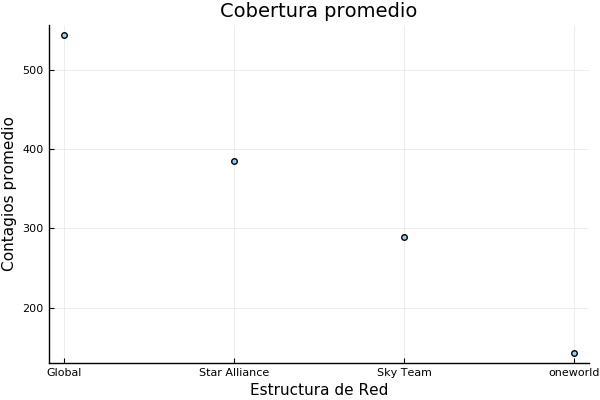

In [171]:
x = ["Global", "Star Alliance", "Sky Team", "oneworld"]
y = [layer_cov_G[1], layer_cov_SA[1], layer_cov_ST[1], layer_cov_OW[1]]
b = scatter(x, y,
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    alpha = 0.4)

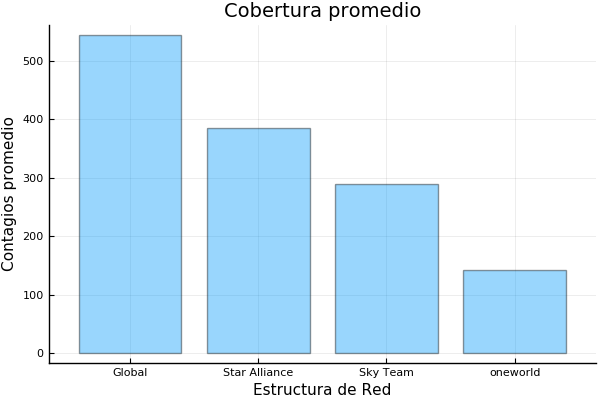

In [11]:
x = ["Global", "Star Alliance", "Sky Team", "oneworld"]
y = [layer_cov_G[1], layer_cov_SA[1], layer_cov_ST[1], layer_cov_OW[1]]
b = bar(x, y,
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    alpha = 0.4)

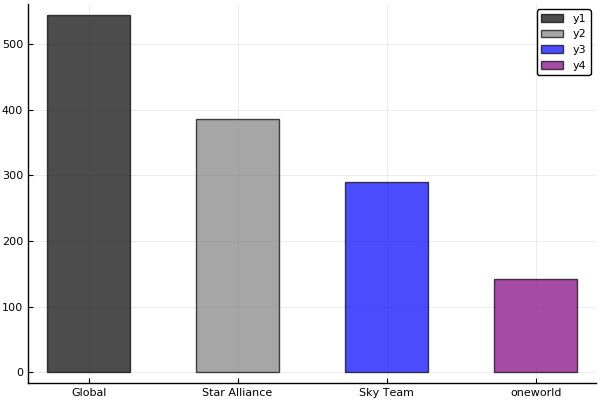

In [170]:
x1 = ["Global"] 
x2 = ["Star Alliance"]
x3 = ["Sky Team"]
x4 = ["oneworld"]
y1 = [layer_cov_G[1]]
y2 = [layer_cov_SA[1]]
y3 = [layer_cov_ST[1]]
y4 = [layer_cov_OW[1]]
bar(x1,y1, color="black", alpha=0.7)
bar!(x2,y2, color="grey", alpha=0.7)
bar!(x3,y3, color="blue", alpha=0.7)
bar!(x4,y4, color="purple", alpha=0.7)

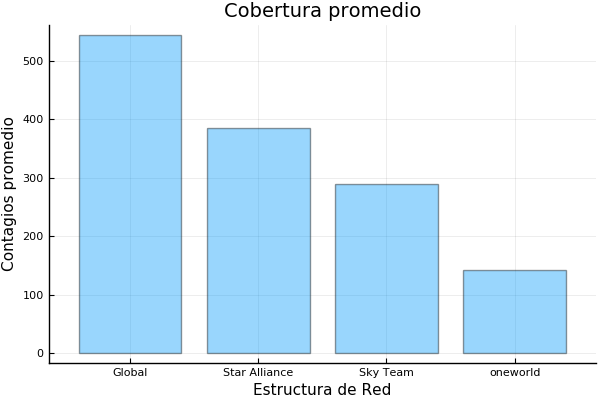

In [164]:
x = ["Global", "Star Alliance", "Sky Team", "oneworld"]
y = [layer_cov_G[1], layer_cov_SA[1], layer_cov_ST[1], layer_cov_OW[1]]
b = bar(x, y, 
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    alpha = 0.4)

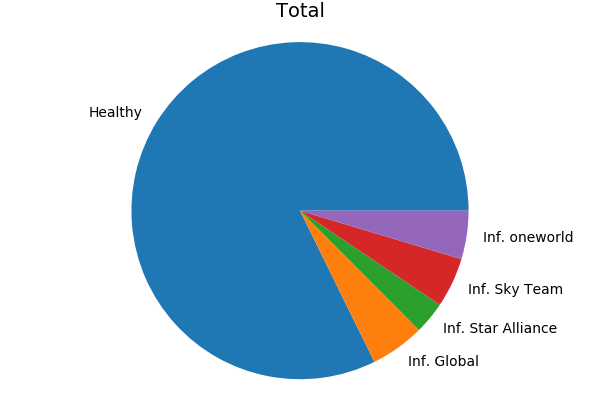

In [188]:
x1 = ["Healthy", "Inf. Global", "Inf. Star Alliance", "Inf. Sky Team", "Inf. oneworld"]
y1 = [82.277, 5.191, 3.108, 4.786, 4.638]
pie(x1, y1, title="Total", l=0.5)

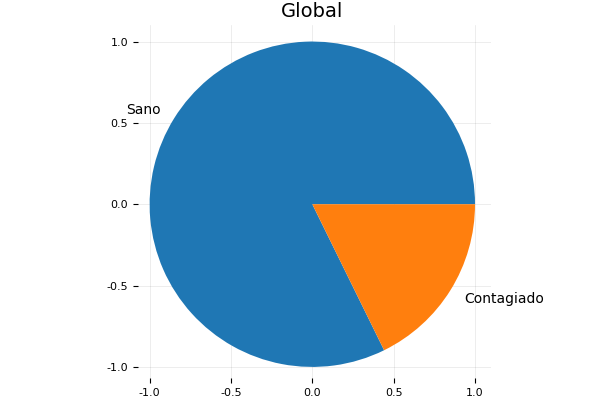

In [12]:
x = ["Sano", "Contagiado"]
y = [2527.54, 544.46]
plot(x, y, title = "Global", l = 0.5, seriestype =:pie)

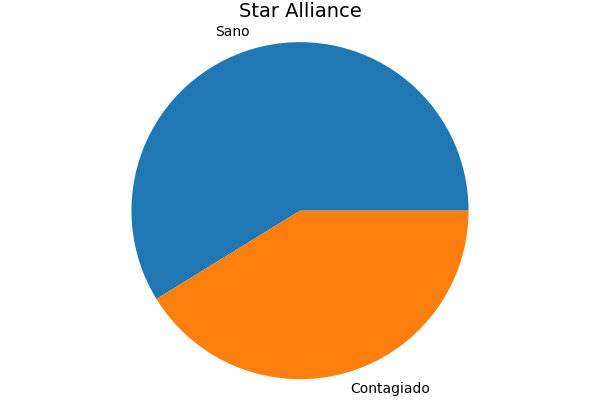

In [13]:
x = ["Sano", "Contagiado"]
y = [549.01, 384.99]
pie(x, y, title="Star Alliance", l=0.5)

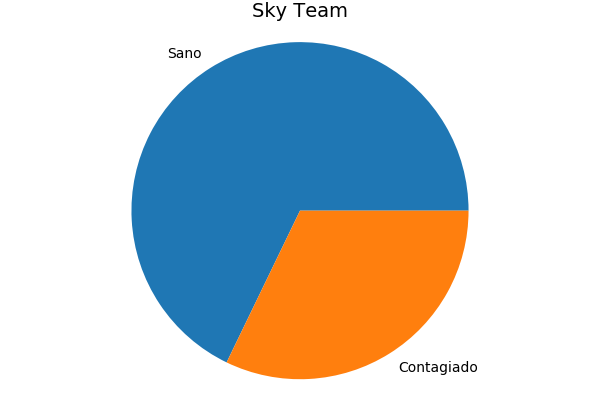

In [14]:
x = ["Sano", "Contagiado"]
y = [610.48, 289.52]
pie(x, y, title="Sky Team", l=0.5)

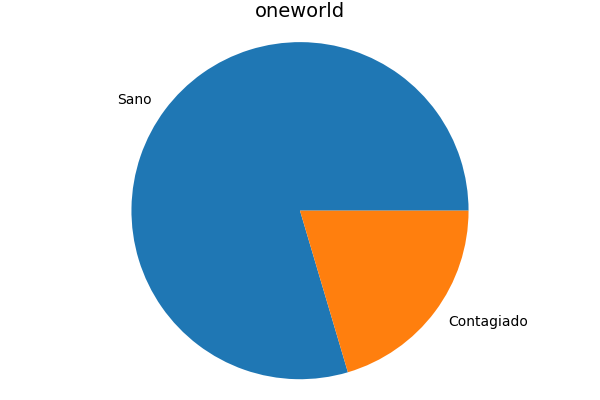

In [15]:
x = ["Sano", "Contagiado"]
y = [555.51, 142.49]
pie(x, y, title="oneworld", l=0.5)

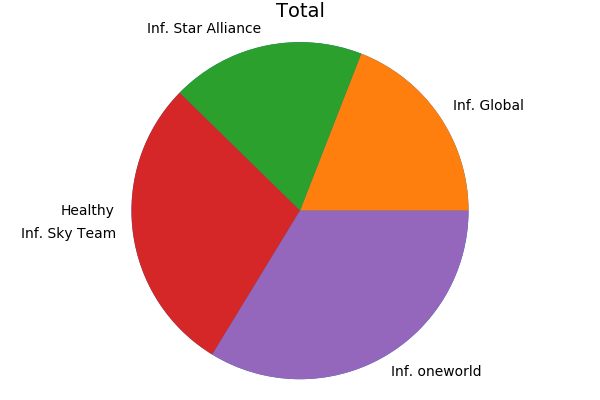

In [195]:
x1 = ["Healthy"]
y1 = [82.277]
x2 = ["Inf. Global", "Inf. Star Alliance", "Inf. Sky Team", "Inf. oneworld"]
y2 = [3.191, 3.108, 4.786, 5.638]
pie(x1, y1, title="Total", l=0.5)
pie!(x2, y2)

### Distribución de grado

In [45]:
function plot_distrib(distrib, tipo::String, titulo::String, color::String) #M::Array{Int64,2}

    distribucion = distrib

    graph = scatter(distribucion, fillcolor = color, markersize = 1, linealpha = 0.5,
    title = titulo,
    xlabel = "Grado",
    ylabel = "Frecuencia",
    xlims = (0,250), #obtener límites
    ylims = (0,850)) #obtener límites
end

plot_distrib

In [57]:
distrib_in_degree_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/grados/global_distrib_in_degree.csv", ',', Int64);
distrib_in_degree_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/grados/Star_Alliance_distrib_in_degree.csv", ',', Int64);
distrib_in_degree_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/grados/oneworld_distrib_in_degree.csv", ',', Int64);
distrib_in_degree_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/grados/Sky_Team_distrib_in_degree.csv", ',', Int64);

In [50]:
hist_in_degree_G = plot_distrib(distrib_in_degree_G, "in", "Global In degree distrib.", "black");
hist_in_degree_SA = plot_distrib(distrib_in_degree_SA, "in", "Star Alliance In degree distrib.", "grey");
hist_in_degree_ST = plot_distrib(distrib_in_degree_ST, "in", "Sky Team In degree distrib.", "blue");
hist_in_degree_OW = plot_distrib(distrib_in_degree_OW, "in", "oneworld In degree distrib.", "purple");

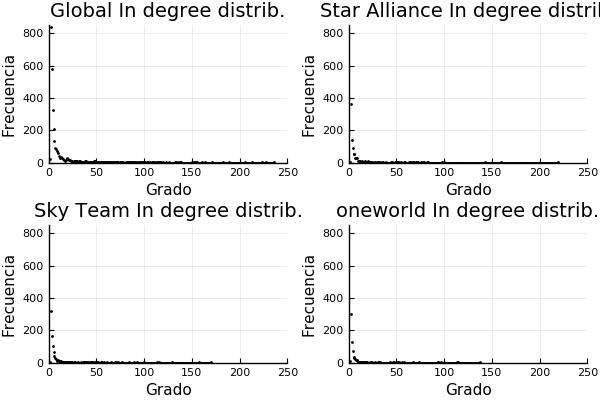

In [51]:
plot(hist_in_degree_G,hist_in_degree_SA,hist_in_degree_ST,hist_in_degree_OW,layout=(2,2),legend=false)

In [58]:
distrib_out_degree_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/grados/global_distrib_out_degree.csv", ',', Int64);
distrib_out_degree_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/grados/Star_Alliance_distrib_out_degree.csv", ',', Int64);
distrib_out_degree_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/grados/oneworld_distrib_out_degree.csv", ',', Int64);
distrib_out_degree_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/grados/Sky_Team_distrib_out_degree.csv", ',', Int64);

In [59]:
hist_out_degree_G = plot_distrib(distrib_out_degree_G, "out", "Global Out degree distrib.", "black");
hist_out_degree_SA = plot_distrib(distrib_out_degree_SA, "out", "Star Alliance Out degree distrib.", "grey");
hist_out_degree_ST = plot_distrib(distrib_out_degree_ST, "out", "Sky Team Out degree distrib.", "blue");
hist_out_degree_OW = plot_distrib(distrib_out_degree_OW, "out", "oneworld Out degree distrib.", "purple");

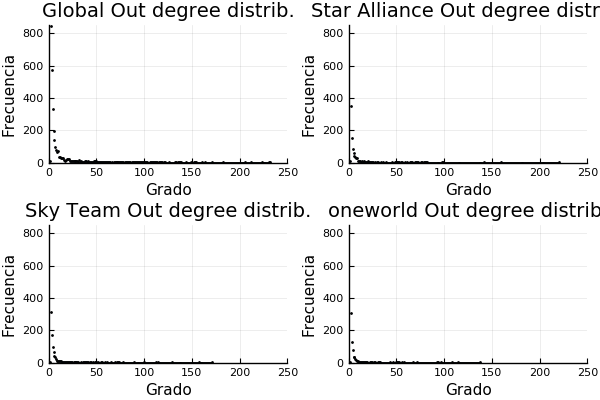

In [60]:
plot(hist_out_degree_G,hist_out_degree_SA,hist_out_degree_ST,hist_out_degree_OW,layout=(2,2),legend=false)

# Análisis de coberturas (Global y Alianza)

In [6]:
tabla_info_net

526×4 Array{Any,2}:
 "Airline"            "Nodes"       "Links"   "Densidad"
 "global"         3072         33093         0.0035078  
 "Star_Alliance"   934          6553         0.00751989 
 "Sky_Team"        900          5879         0.0072661  
 "oneworld"        698          3579         0.00735654 
 "AA"              259          1265         0.0189309  
 "TK"              242           540         0.00925894 
 "DL"              230          1146         0.0217581  
 "MU"              192          1050         0.0286322  
 "CZ"              188          1240         0.0352714  
 "UA"              184           905         0.0268769  
 "FR"              176          2484         0.0806494  
 "BA"              175           372         0.0122167  
 ⋮                                                      
 "H7"                2             2         1.0        
 "GY"                2             2         1.0        
 "EW"                2             1         0.5        
 "D6"      

##### Variable independiente x (medidas de la red)

In [35]:
lista_aerolineas

526-element Array{String,1}:
 "Airlines"     
 "global"       
 "Star_Alliance"
 "Sky_Team"     
 "oneworld"     
 "AA"           
 "TK"           
 "DL"           
 "MU"           
 "CZ"           
 "UA"           
 "FR"           
 "BA"           
 ⋮              
 "H7"           
 "GY"           
 "EW"           
 "D6"           
 "7E"           
 "6Y"           
 "6I"           
 "5M"           
 "5G"           
 "4K"           
 "4D"           
 "4B"           

In [40]:
# NODOS

columna_nodos = tabla_info_net[:,2];
datos_nodos = columna_nodos[2:5]

4-element Array{Any,1}:
 3072
  934
  900
  698

In [43]:
layer_cov_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/cobertura/global_layer_coverage.csv", ',', Float64)
layer_cov_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/cobertura/Star_Alliance_layer_coverage.csv", ',', Float64)
layer_cov_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/cobertura/oneworld_layer_coverage.csv", ',', Float64)
layer_cov_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/cobertura/Sky_Team_layer_coverage.csv", ',', Float64)

1×1 Array{Float64,2}:
 289.52704444444447

In [57]:
x = datos_nodos
y = [layer_cov_G[1], layer_cov_SA[1], layer_cov_ST[1], layer_cov_OW[1]]

dp = hcat(x,y)

4×2 Array{Any,2}:
 3072  544.464
  934  384.997
  900  289.527
  698  142.492

In [109]:
dp

4×2 Array{Any,2}:
 3072  544.464
  934  384.997
  900  289.527
  698  142.492

In [60]:
cdp =convert(DataFrame, dp)

,x1,x2
,Any,Any
1,3072,544.464
2,934,384.997
3,900,289.527
4,698,142.492


In [93]:
names(cdp)

2-element Array{Symbol,1}:
 :x1
 :x2

In [92]:
cdp.x1

4-element Array{Any,1}:
 3072
  934
  900
  698

In [76]:
df = DataFrame(A = [3072.0, 934.0, 900.0, 698.0], B = y)
df[1]

4-element Array{Float64,1}:
 3072.0
  934.0
  900.0
  698.0

In [86]:
df

,A,B
,Float64,Float64
1,3072.0,544.464
2,934.0,384.997
3,900.0,289.527
4,698.0,142.492


In [113]:
ols = lm(@formula(B ~ A), df)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: B ~ 1 + A

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   159.523   93.8702  1.6994   0.2313
A            0.129084 0.0551065 2.34245   0.1439


In [116]:
round.(predict(ols), digits=5)

4-element Array{Float64,1}:
 556.06974
 280.08776
 275.6989 
 249.6239 

In [119]:
polyfit(x::Vector, y::Vector, deg::Int) = collect(v ^ p for v in x, p in 0:deg) \ y
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 6, 17, 34, 57, 86, 121, 162, 209, 262, 321]
@show polyfit(x, y, 2)

polyfit(x, y, 2) = [1.0, 2.0, 3.0]


3-element Array{Float64,1}:
 0.9999999999999506
 2.000000000000017 
 2.9999999999999987

In [120]:
?polyfit

search: polyfit topological_sort_by_dfs



No documentation found.

`polyfit` is a `Function`.

```
# 1 method for generic function "polyfit":
[1] polyfit(x::Array{T,1} where T, y::Array{T,1} where T, deg::Int64) in Main at In[119]:1
```


In [131]:
dp[:,2]

4-element Array{Any,1}:
 544.4640625000001 
 384.9970235546039 
 289.52704444444447
 142.49216332378222

In [132]:
polyfit(x::Vector, y::Vector, deg::Int) = collect(v ^ p for v in x, p in 0:deg) \ y
x = [3072, 934, 900, 698]
y = [544.464, 384.997, 289.527, 142.492]
@show polyfit(x, y, 2)

polyfit(x, y, 2) = [-728.658, 1.48445, -0.000348308]


3-element Array{Float64,1}:
 -728.6578910167253      
    1.4844457278905954   
   -0.0003483080435850051

x = Any[3072, 934, 900, 698]
y = [544.464, 384.997, 289.527, 142.492]


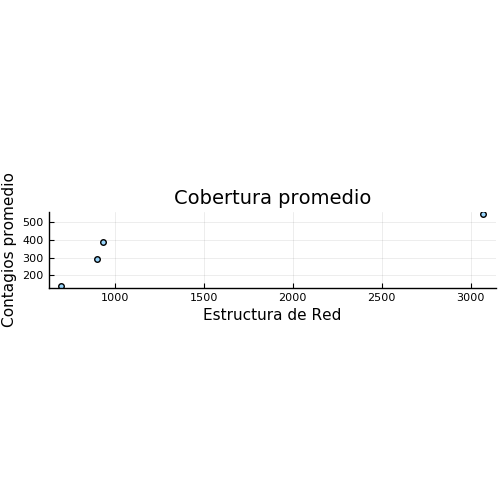

In [54]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]
x = datos_nodos
@show x
y = [layer_cov_G[1], layer_cov_SA[1], layer_cov_ST[1], layer_cov_OW[1]]
@show y
scatter(x, y,
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    size = (500,500),
    aspect_ratio= 1,
    alpha = 0.4)
#

## Ejemplo de GLM (linear regression)

In [101]:
data1 = DataFrame(X=[1,2,3], Y=[2,4,7])

,X,Y
,Int64,Int64
1,1,2
2,2,4
3,3,7


In [102]:
typeof(data1)

DataFrame

In [103]:
ols = lm(@formula(Y ~ X), data1)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Y ~ 1 + X

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -0.666667   0.62361 -1.06904   0.4788
X                  2.5  0.288675  8.66025   0.0732


### Para enlaces

In [13]:
# ENLACES

columna_enlaces = tabla_info_net[:,3];
datos_enlaces = columna_enlaces[2:5]

4-element Array{Any,1}:
 33093
  6553
  5879
  3579

In [ ]:
# DENSIDAD

columna_densidad = tabla_info_net[:,4];
datos_densidad = columna_densidad[2:5]

In [ ]:
# BETWEENNESS PROMEDIO


 = ["Airline" "Nodes" "Links" "Densidad"]

for i in 2:5 #length(lista_aerolineas) #Desde el 2 para no tomar la primera entrada "Airlines"
    
    airline_code = lista_aerolineas[i] #Código
    aerolinea_betweenness = string(airline_code, "_betweenness_centrality.csv")
    leo_betweenness = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/betweenness/$aerolinea_betweenness", Float64)
    
    datos_betweenness = []
    datos_betweenness = push!(datos_betweenness, renglon)
    
end


between_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/betweenness/global_betweenness_centrality.csv", ',', Float64);
between_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/betweenness/Star_Alliance_betweenness_centrality.csv", ',', Float64);
between_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/betweenness/oneworld_betweenness_centrality.csv", ',', Float64);
between_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/betweenness/Sky_Team_betweenness_centrality.csv", ',', Float64);



In [18]:
gl=readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/matriz/global_import_matrix.csv", Int64)
    

3072×3072 Array{Int64,2}:
 0  0  0  1  0  0  0  1  1  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  1  1  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  1  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  1  1  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  1  1  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  1  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  0  1  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  1  0  1  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  1  0  0  1  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0

### Son diferentes los betweenness que obtuve del script y los que ahora saco

In [19]:
between_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/betweenness/global_betweenness_centrality.csv", ',', Float64)

3072×1 Array{Float64,2}:
 3.385608806155707e-5  
 1.4377768123819417e-6 
 1.002556006352087e-5  
 0.02672402227135494   
 6.044880099111176e-7  
 0.00041941358092630976
 6.826971354034154e-6  
 7.572140943864694e-5  
 0.009076993711956366  
 3.569252719181918e-5  
 8.991805012200456e-7  
 5.832100712580029e-6  
 1.1782992940312442e-5 
 ⋮                     
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   

In [21]:
grafo = DiGraph(gl)
res = betweenness_centrality(grafo, endpoints=true)


3072-element Array{Float64,1}:
 0.0006853218861071615
 0.0006529035748579847
 0.0006614913581091249
 0.027375488069400555 
 0.0006520702860555137
 0.0010708793789719164
 0.0006582927693996362
 0.0007271872074842501
 0.009728459510002034 
 0.0006871583252374221
 0.0006523649785468227
 0.0006572978987581827
 0.0006632487909859138
 ⋮                    
 0.0006514657980456026
 0.0006514657980456026
 0.0006514657980456026
 0.0006514657980456026
 0.0006514657980456026
 0.0006514657980456026
 0.0006514657980456026
 0.0006514657980456026
 0.0006514657980456026
 0.0006514657980456026
 0.0006514657980456026
 0.0006514657980456026

In [16]:
?betweenness_centrality

search: betweenness_centrality



```
betweenness_centrality(g[, vs])
betweenness_centrality(g, k)
```

Calculate the [betweenness centrality](https://en.wikipedia.org/wiki/Centrality#Betweenness_centrality) of a graph `g` across all vertices, a specified subset of vertices `vs`, or a random subset of `k` vertices. Return a vector representing the centrality calculated for each node in `g`.

### Optional Arguments

  * `normalize=true`: If true, normalize the betweenness values by the

total number of possible distinct paths between all pairs in the graphs. For an undirected graph, this number is $\frac{(|V|-1)(|V|-2)}{2}$ and for a directed graph, ${(|V|-1)(|V|-2)}$.

  * `endpoints=false`: If true, include endpoints in the shortest path count.

Betweenness centrality is defined as: $bc(v) = \frac{1}{\mathcal{N}} \sum_{s \neq t \neq v} \frac{\sigma_{st}(v)}{\sigma_{st}}$.

### References

  * Brandes 2001 & Brandes 2008

# Examples

```jldoctest
julia> using LightGraphs

julia> betweenness_centrality(StarGraph(3))
3-element Array{Float64,1}:
 1.0
 0.0
 0.0

julia> betweenness_centrality(PathGraph(4))
4-element Array{Float64,1}:
 0.0
 0.6666666666666666
 0.6666666666666666
 0.0
```


In [25]:
# GRADO PROMEDIO DE ENTRADA

datos_in_degree = []

for i in 2:5 #length(lista_aerolineas) #Desde el 2 para no tomar la primera entrada "Airlines"
    
    airline_code = lista_aerolineas[i] #Código
    aerolinea_in_degree = string(airline_code, "_in_degree.csv")
    leo_in_degree = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/grados/$aerolinea_in_degree", Float64)
    
    promedio_degree = mean(leo_in_degree)
    
    datos_in_degree = push!(datos_in_degree, promedio_degree)
    
end

return datos_in_degree

4-element Array{Any,1}:
 10.7724609375      
  7.016059957173447 
  6.532222222222222 
  5.1275071633237825

In [ ]:
# GRADO PROMEDIO DE SALIDA

datos_in_degree = []

for i in 2:5 #length(lista_aerolineas) #Desde el 2 para no tomar la primera entrada "Airlines"
    
    airline_code = lista_aerolineas[i] #Código
    aerolinea_out_degree = string(airline_code, "_out_degree.csv")
    leo_out_degree = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/grados/$aerolinea_out_degree", Float64)
    
    promedio_degree = mean(leo_out_degree)
    
    datos_out_degree = push!(datos_out_degree, promedio_degree)
    
end

return datos_out_degree

In [ ]:
# CLUSTERING COEFFICIENT GLOBAL

##### Coberturas, eje y

In [196]:
# Coberturas, mi eje y
layer_cov_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/cobertura/global_layer_coverage.csv", ',', Float64);
layer_cov_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/cobertura/Star_Alliance_layer_coverage.csv", ',', Float64);
layer_cov_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/cobertura/oneworld_layer_coverage.csv", ',', Float64);
layer_cov_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/cobertura/Sky_Team_layer_coverage.csv", ',', Float64);

#### Plots

In [ ]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

b = scatter(x, y,
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    alpha = 0.4)

### Prueba regresión

In [ ]:
a = [1,2,3,4,5]
b = [12,26,31,42,50]